In [2]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2024-01-26 16:20:12,945][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-01-26 16:20:13,357][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [3]:
# ANIMALS
ANIMAL_IDS = ["C214", "C215", "C220", "C221", "C222", "C223"]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [4]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 20 sessions for C214 between 2024-01-05 and 2024-01-25
fetched 20 sessions for C215 between 2024-01-05 and 2024-01-25
Not all variables are the same length. Cannot create proper DataFrame
result: 7
hits: 7
violations: 7
temperror: 7
hit_rate: 6
error_rate: 6
violation_rate: 6
temp_error_rate: 6
n_lpokes: 6
n_cpokes: 6
n_rpokes: 6
trial_dur: 6
trial_start: 6
valid_early_spoke: 6
first_spoke: 6
first_lpoke: 6
first_rpoke: 6
n_settling_ins: 6
avg_settling_in: 6
cpoke_dur: 6
n_incorr_spokes_during_give_del: 6
stage: 6
curriculum: 6
sides: 7
SMA_set: 6
is_match: 7
sa: 6
sb: 6
stimuli_on: 6
settling_in_dur: 6
legal_cbreak_dur: 6
pre_dur: 6
adj_pre_dur: 6
stimulus_dur: 6
delay_dur: 6
post_dur: 6
sb_extra_dur: 6
viol_off_dur: 6
pre_go_dur: 6
inter_trial_dur: 6
go_type: 6
go_dur: 6
give_type_set: 6
give_type_imp: 6
give_frac: 6
give_delay_dur: 6
give_xtra_light_delay_dur: 6
give_use: 7
replay_on: 6
timeouts: 7
water_delivered: 7
give_water_not_drunk: 7
crash_hist: 6
pro_stim_set: 6
anti

In [5]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS + ["C222"], date_min=date_min, date_max=date_max
# )
f_name = "C2s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2024-01-05 -> 2024-01-25
Returning appended df with entries between 2024-01-05 and 2024-01-25
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/C2s_days_df.csv


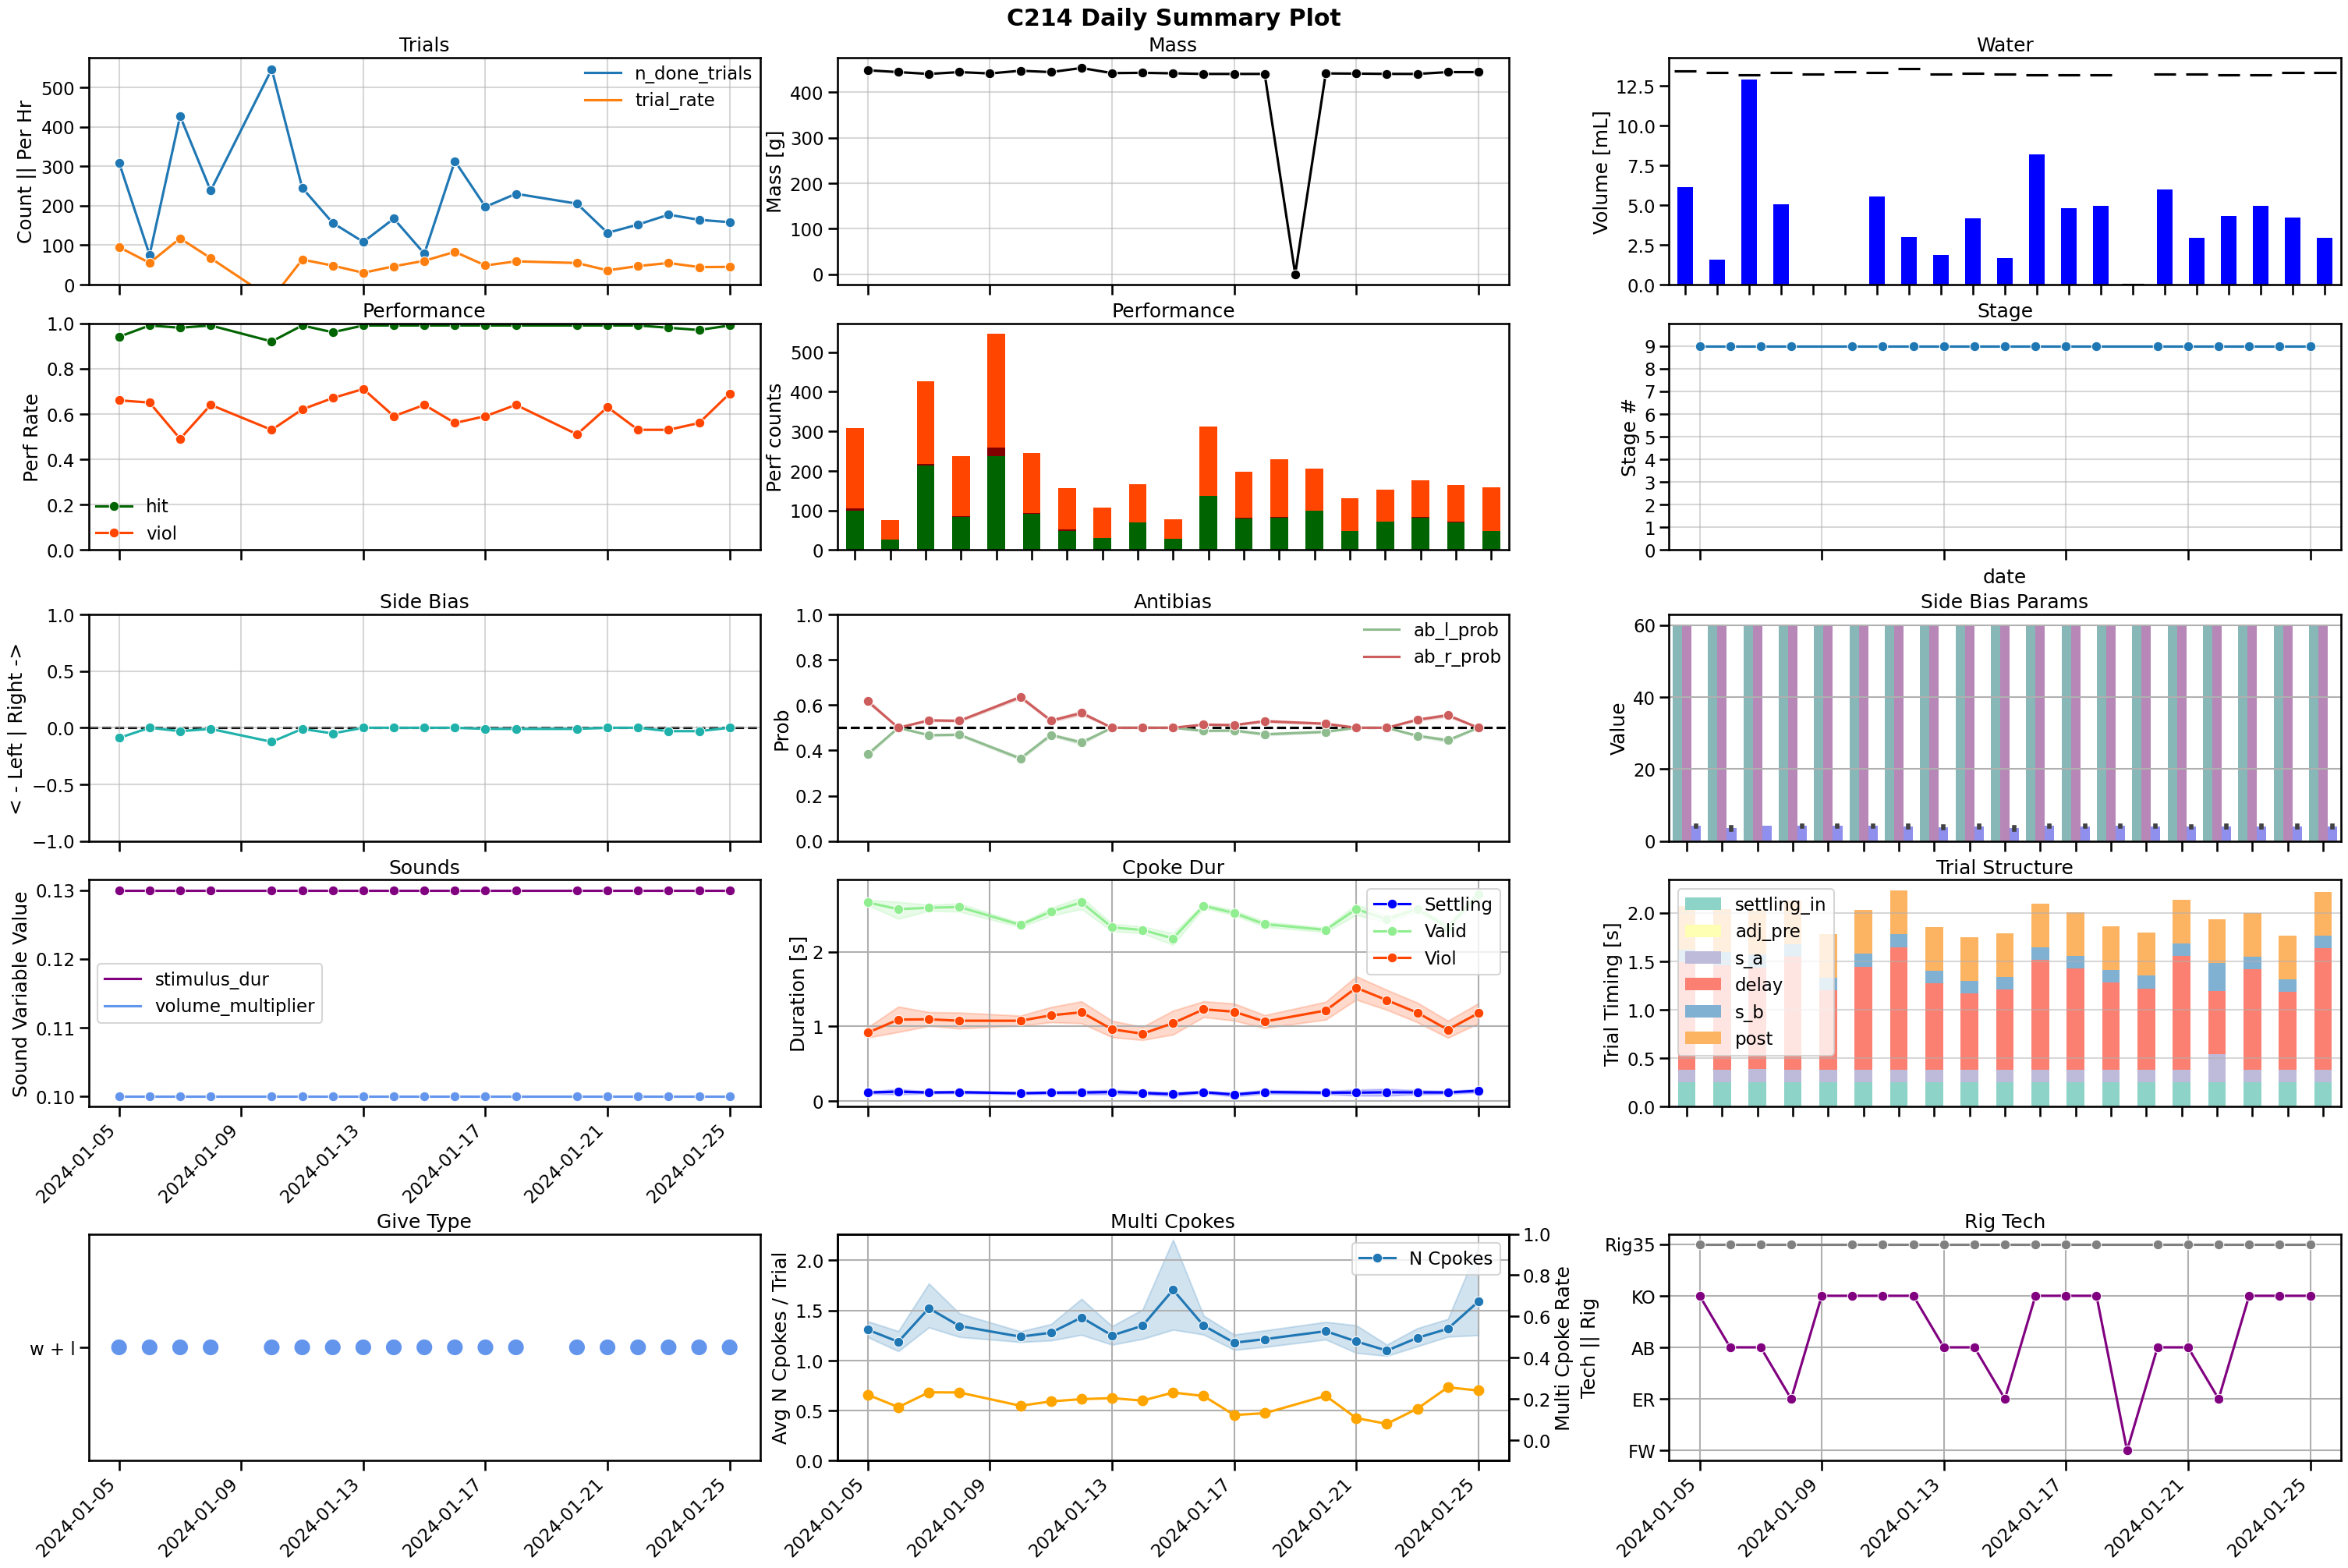

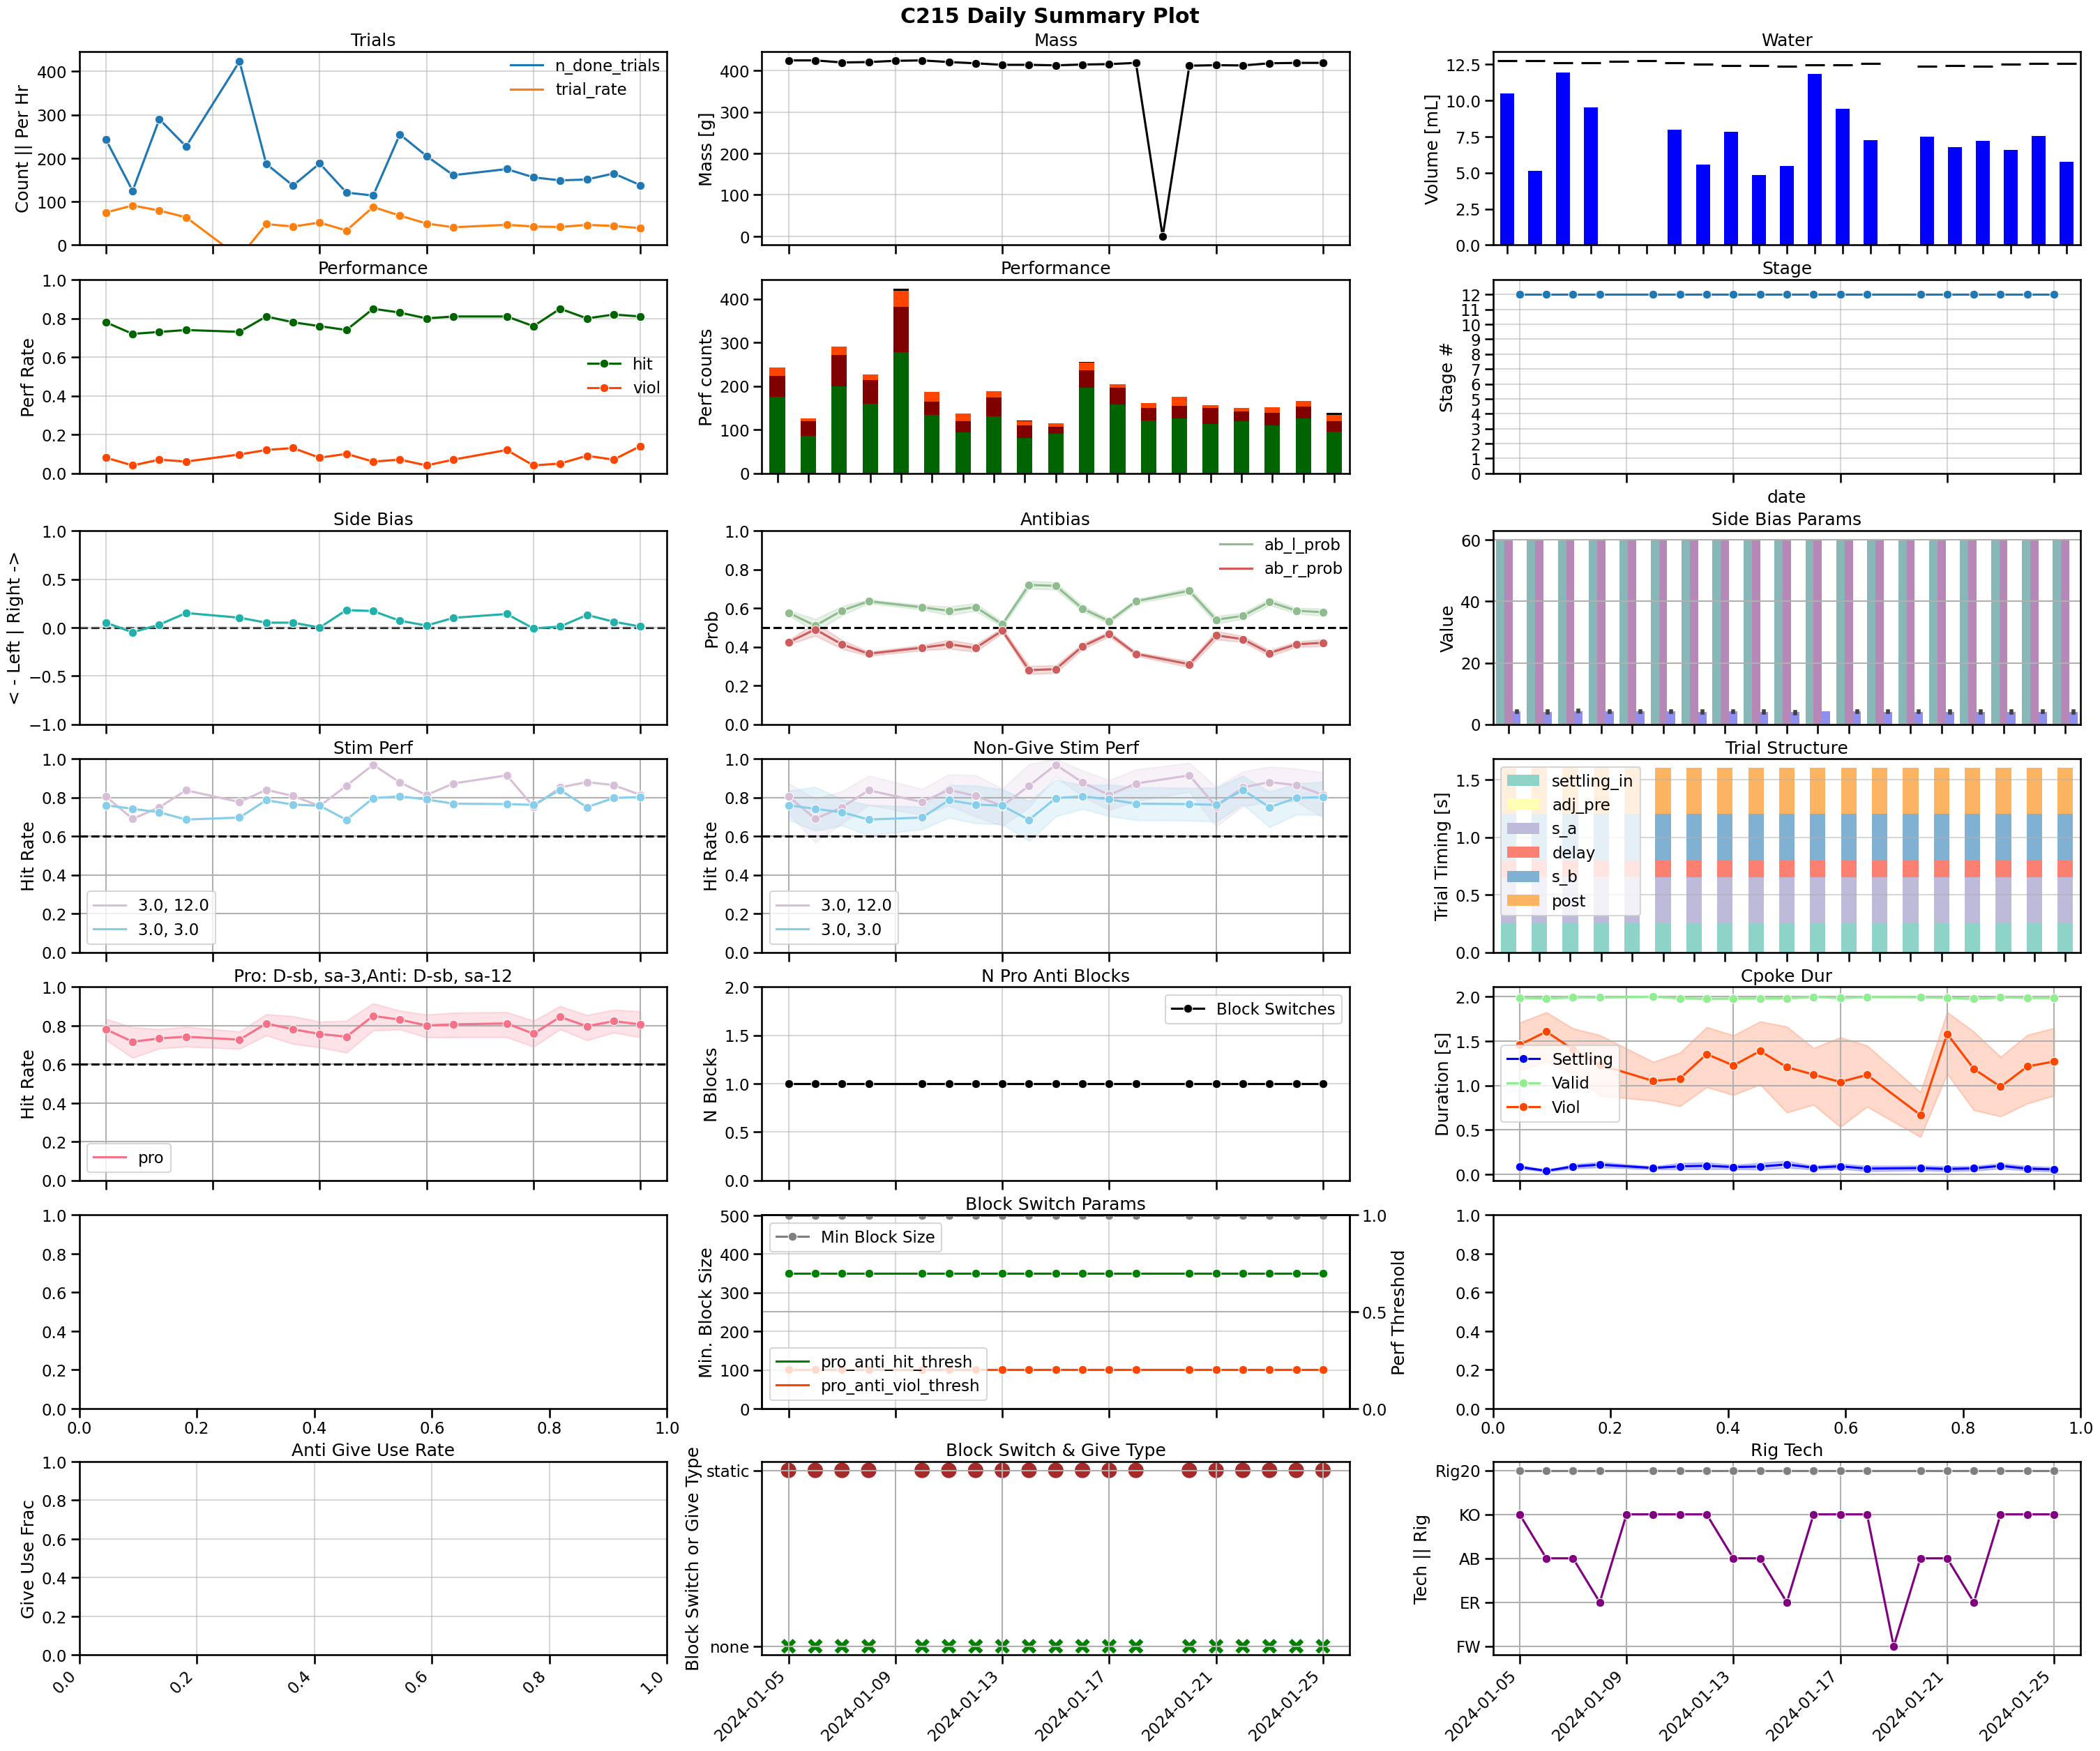

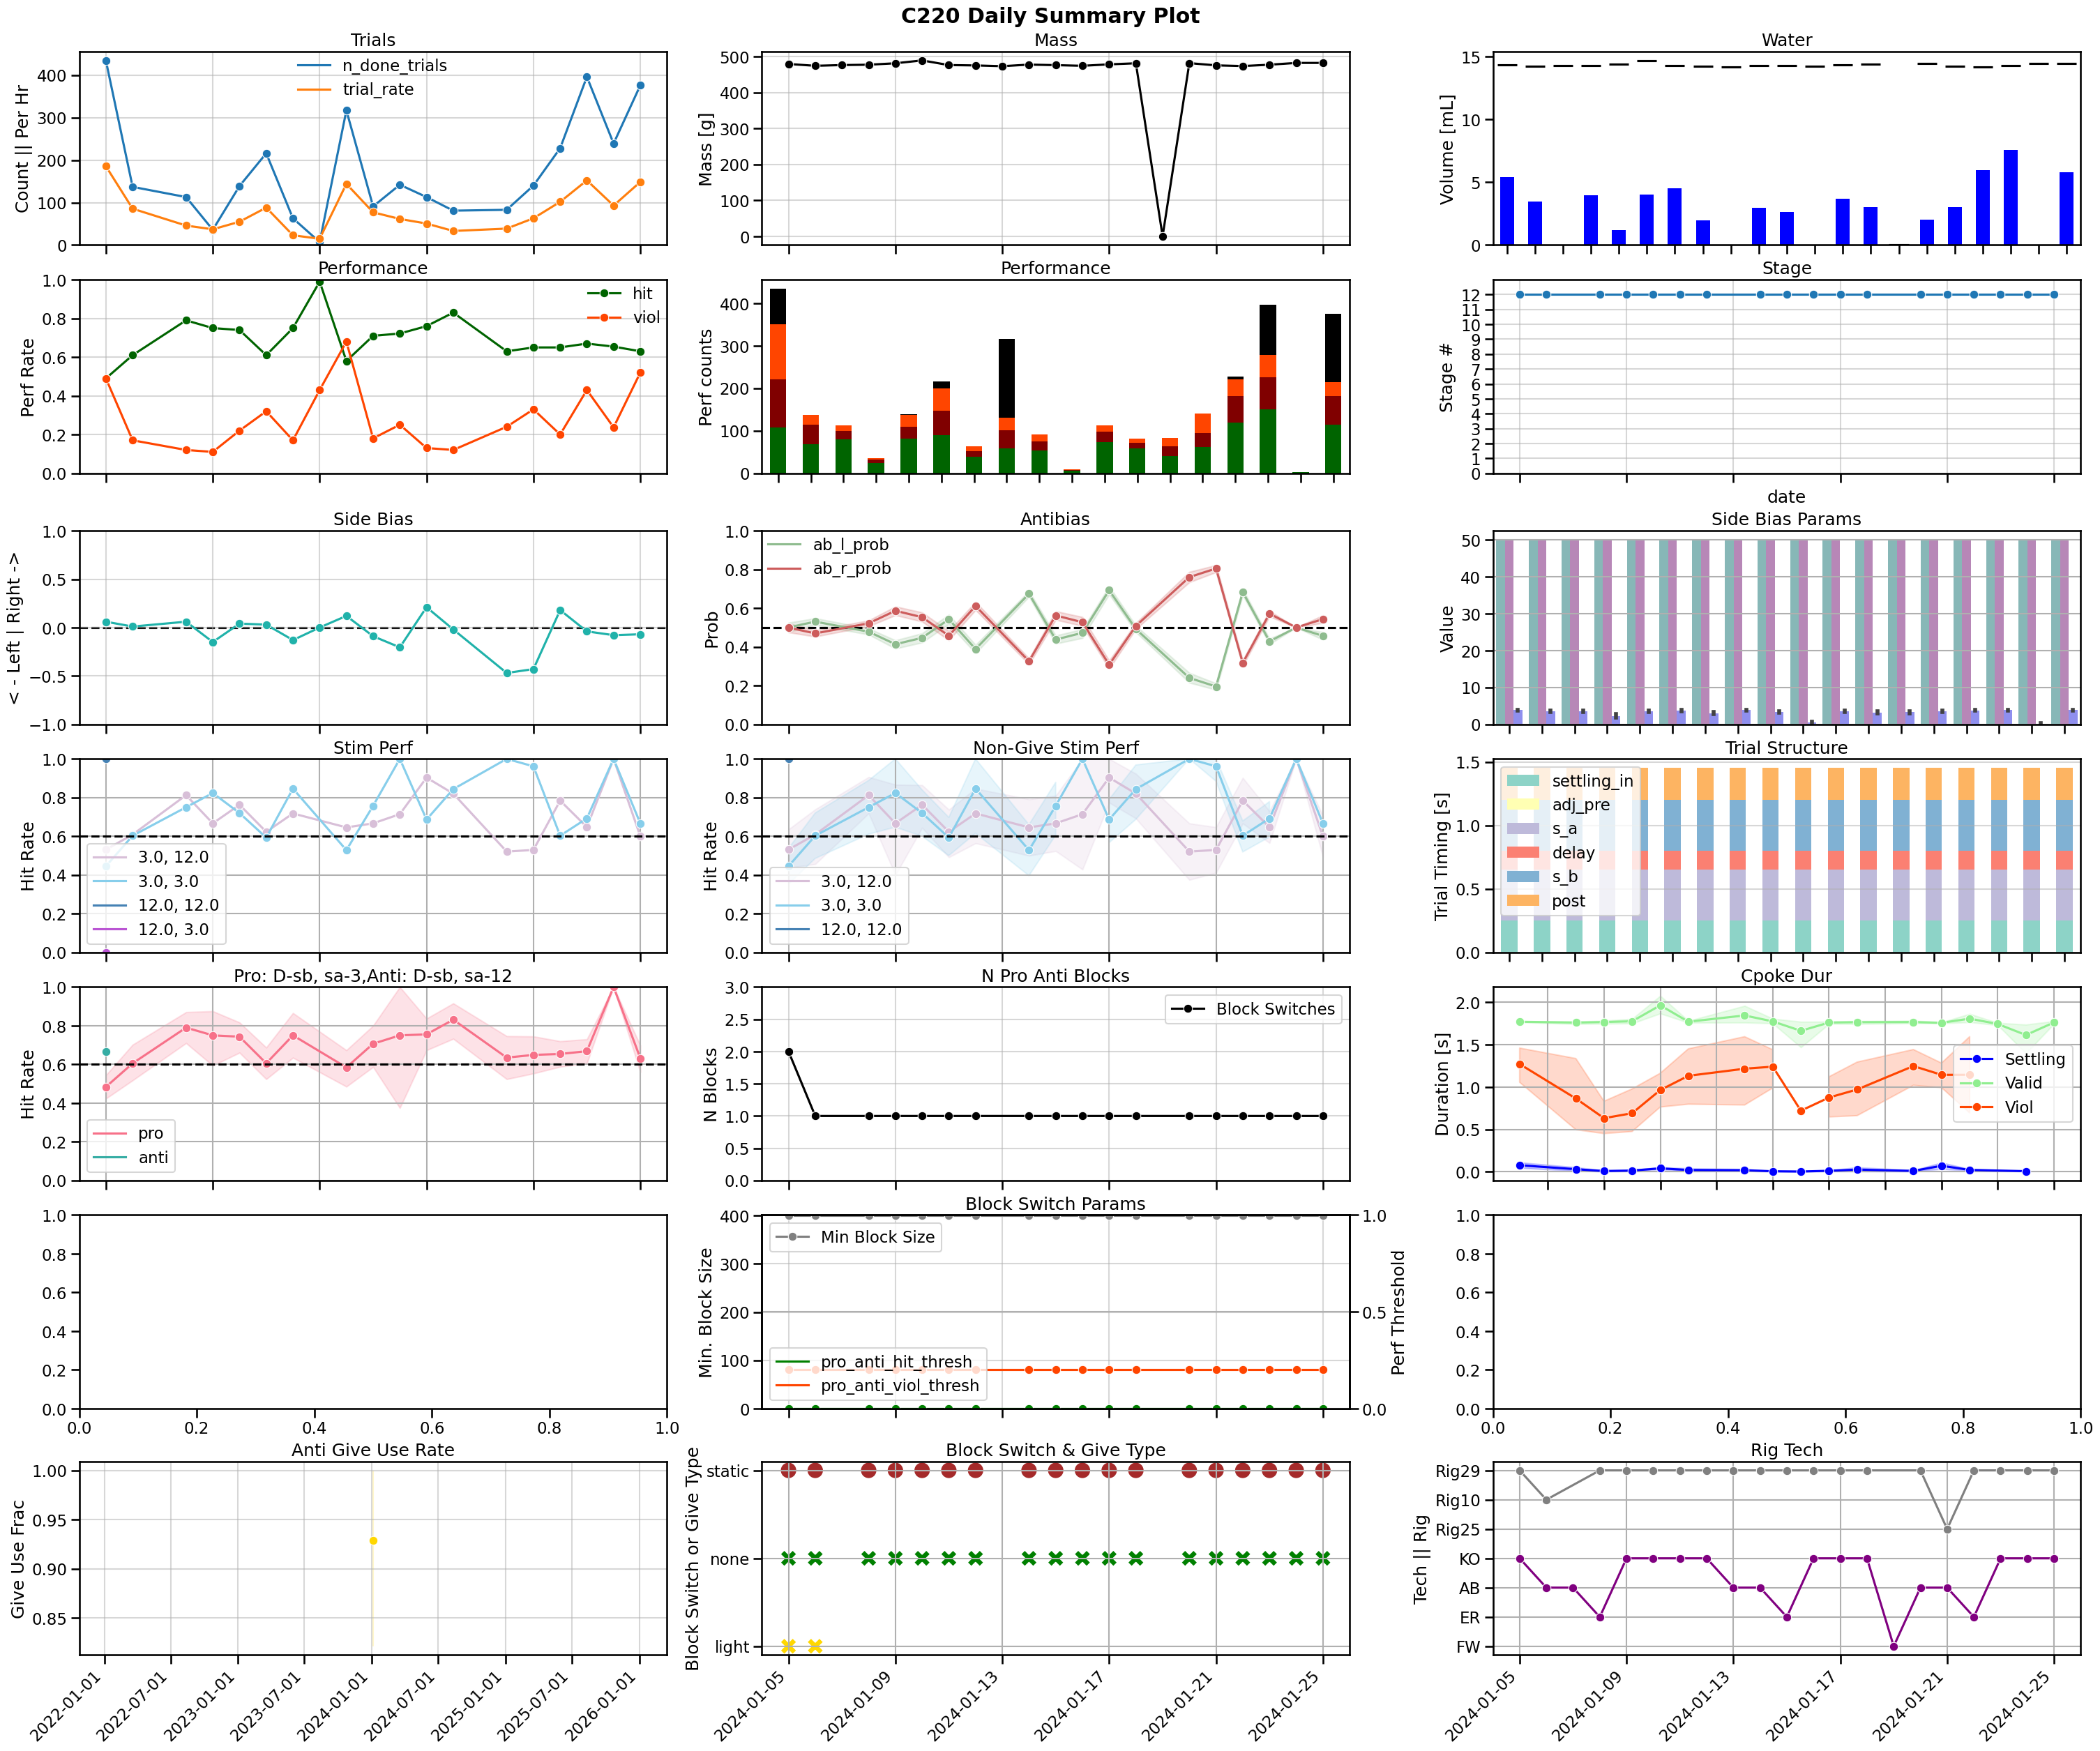

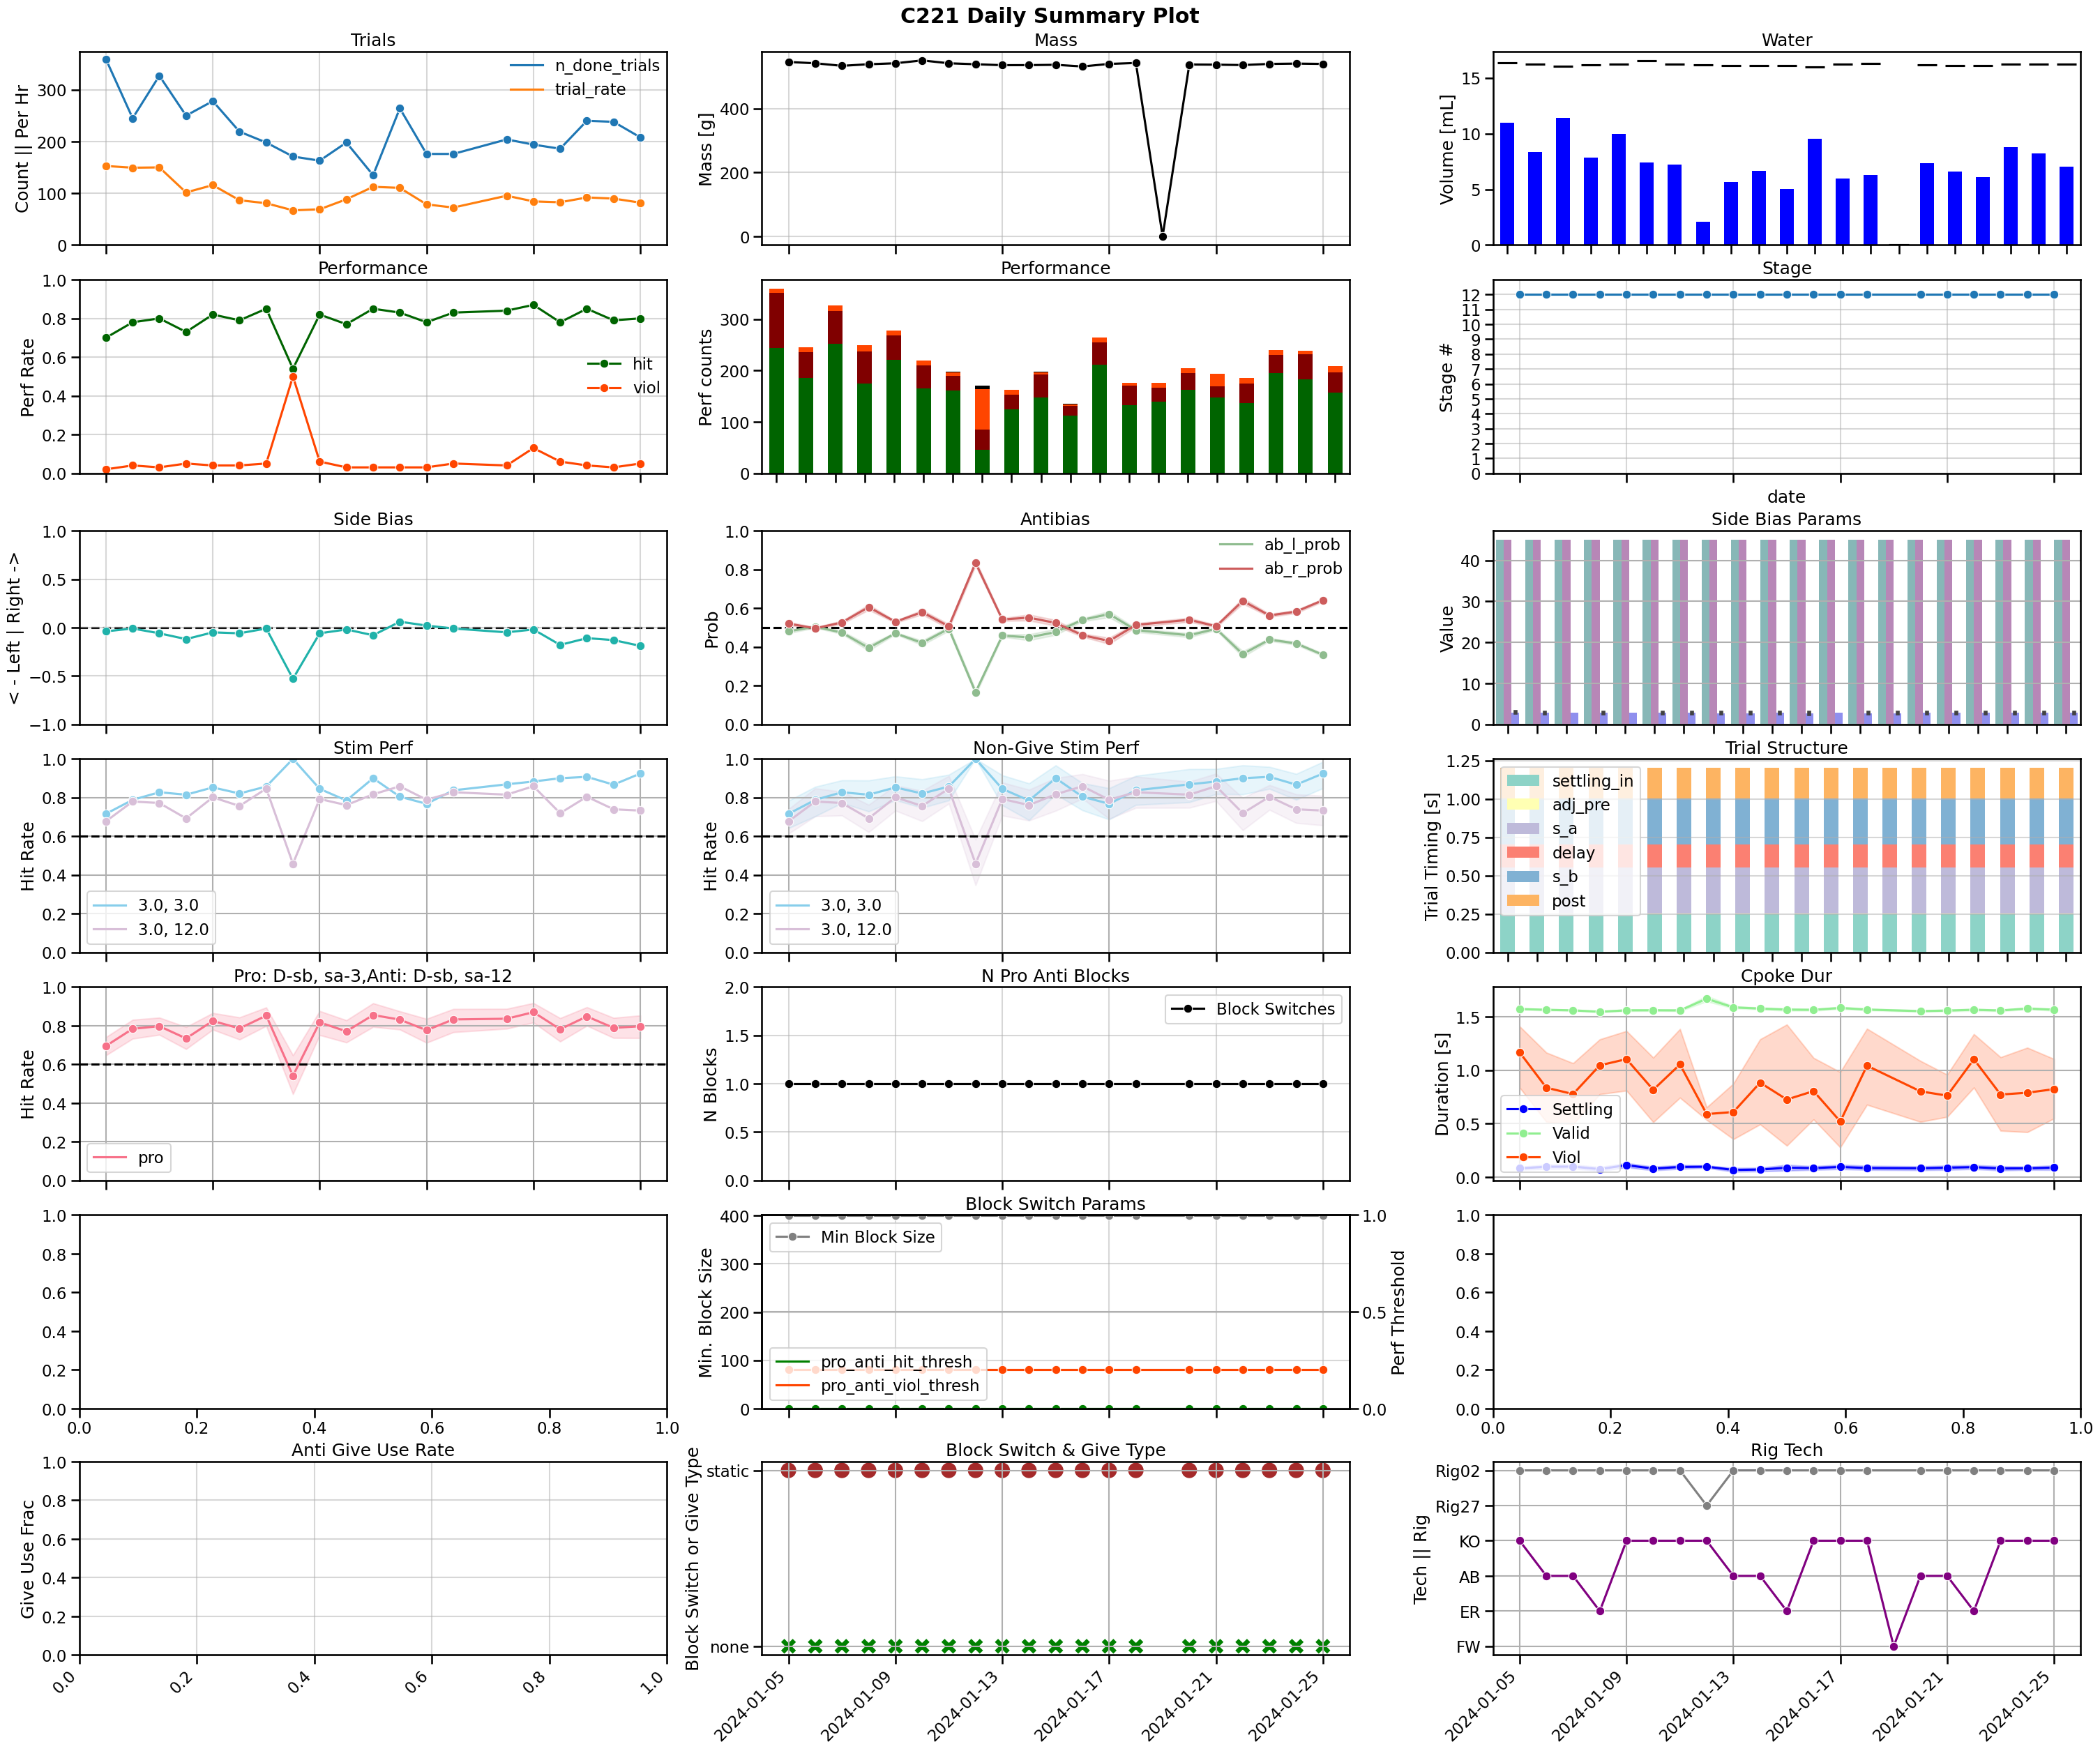

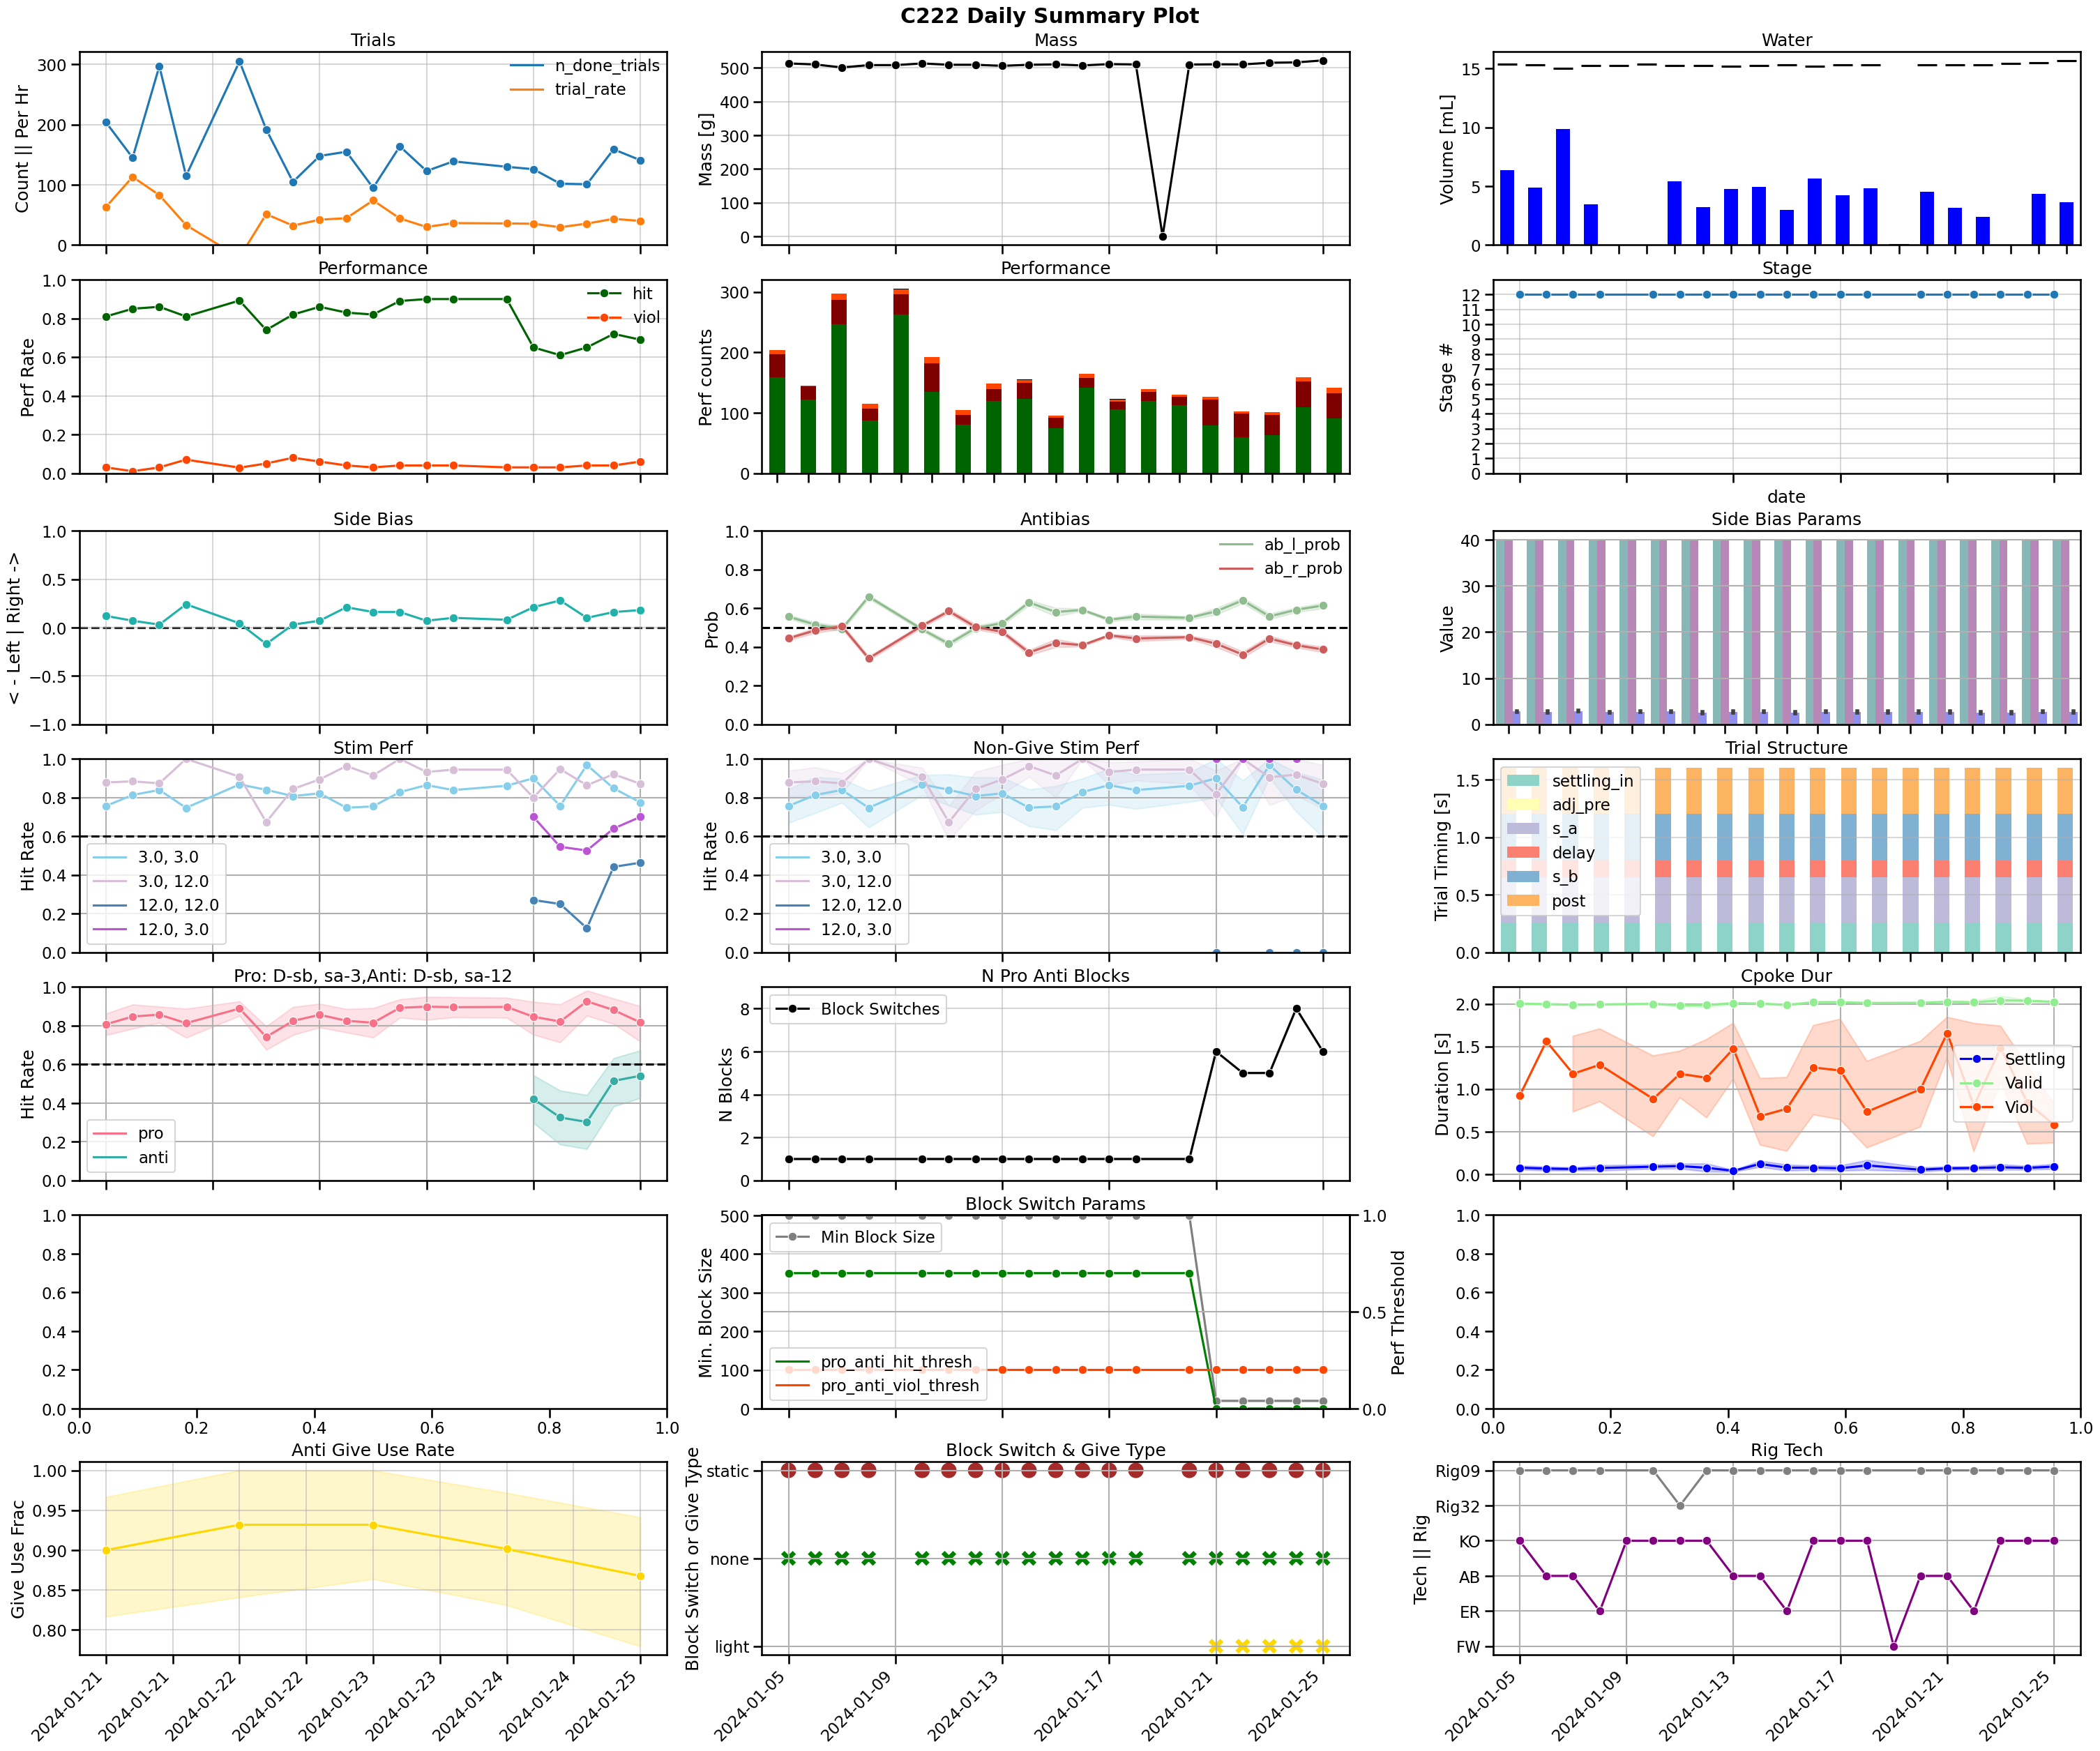

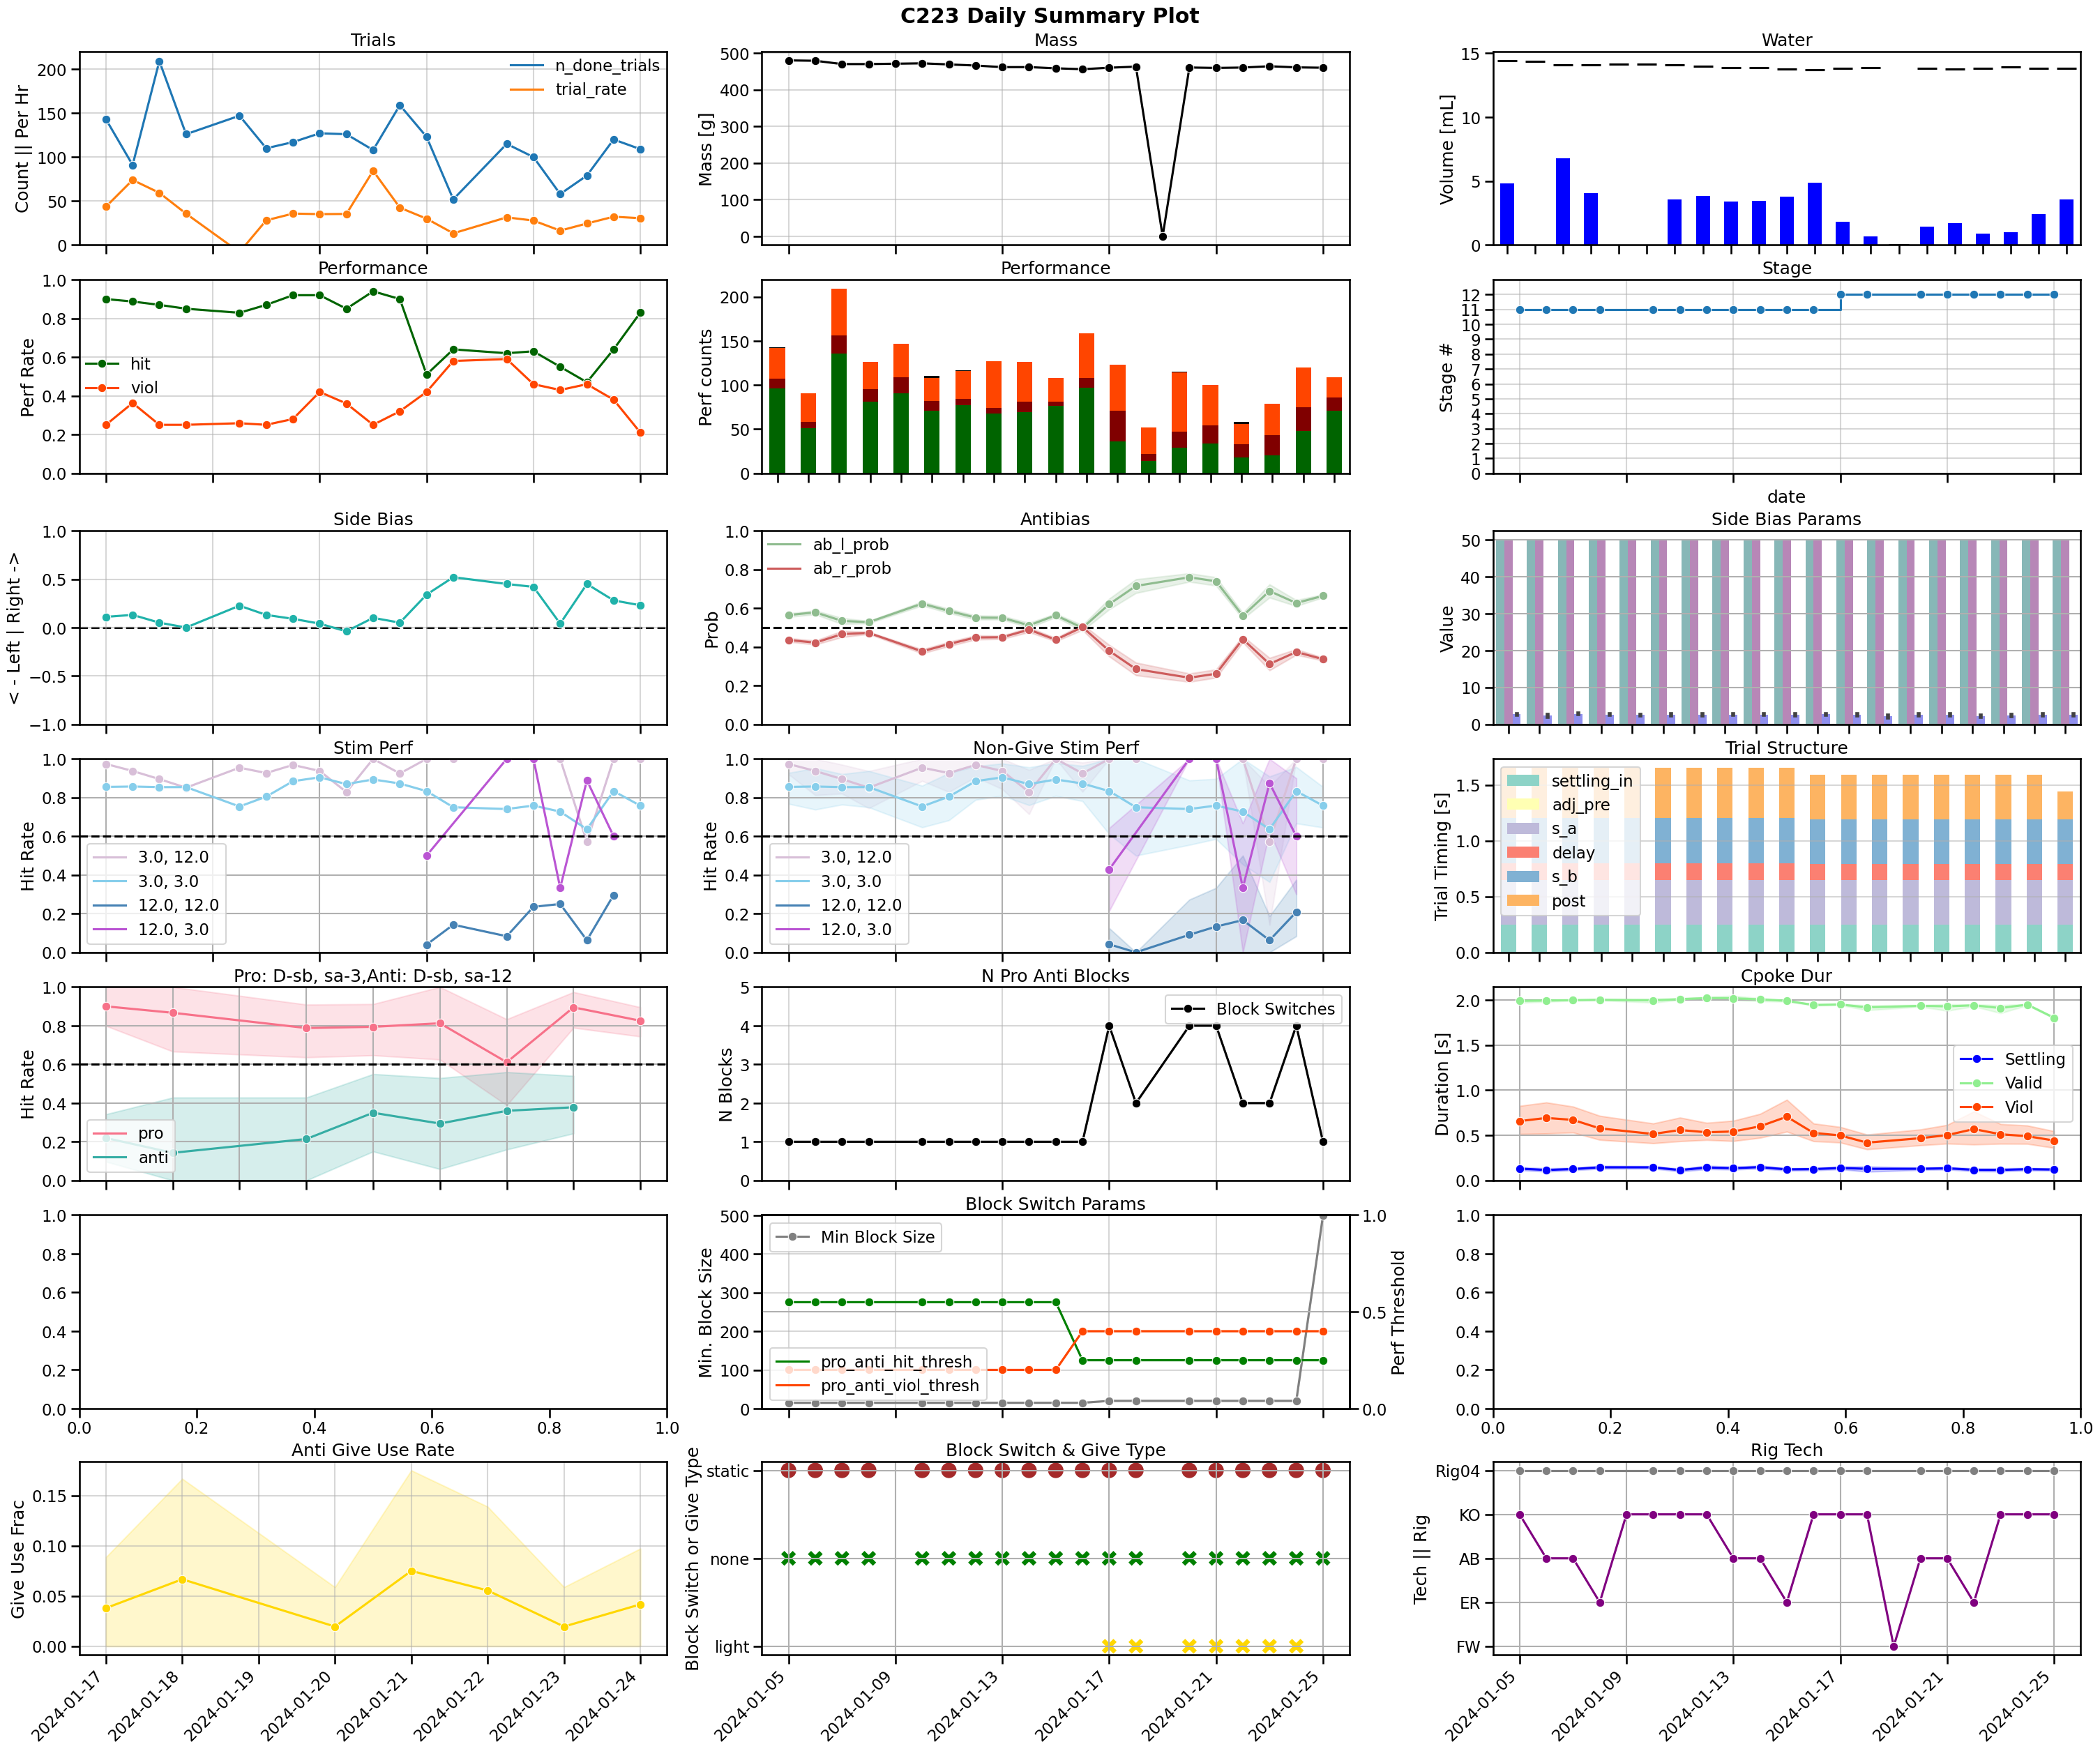

In [6]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [7]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C214_2024-01-25_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making C215_2024-01-25_day_summary
['s_a', 'post', 'go']
skipping anti give del metrics
making C220_2024-01-25_day_summary
[]
skipping violations by period due to hist error


/Users/jessbreda/Desktop/github/jbreda_animal_training/code/training_performance/plot_trials_info.py:1351: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  _ = sns.histplot(


skipping anti give del metrics
making C221_2024-01-25_day_summary
['s_a', 'delay', 'post', 'go']
skipping anti give del metrics
making C222_2024-01-25_day_summary
['s_a', 'delay', 's_b', 'post']
making C223_2024-01-25_day_summary
['s_a', 'delay', 's_b']
skipping anti give del metrics
